In [102]:
import numpy as np
import plotly.graph_objs as go
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
from rdkit import Chem

In [103]:
base_path = "../data/matching/matchspectra_R"
base_path_a = "../data/matching/matchms"
file_path1 = os.path.join(base_path, "match_1%", "match_ref_norm", "matchSpectra_results_source_1%_tp3_norm.tsv")
file_path2 = os.path.join(base_path, "match_1%", "match_ref_norm", "matchSpectra_results_source_1%_tp5_norm.tsv")
file_path3 = os.path.join(base_path, "match_1%", "match_ref_norm", "matchSpectra_results_source_1%_tp10_norm.tsv")
file_path4 = os.path.join(base_path, "match_1%", "match_ref_norm", "matchSpectra_results_source_1%_tp20_norm.tsv")
file_path5 = os.path.join(base_path, "match_10%", "match_ref_norm", "matchSpectra_results_source_10%_tp3_norm.tsv")
file_path6 = os.path.join(base_path, "match_10%", "match_ref_norm", "matchSpectra_results_source_10%_tp5_norm.tsv")
file_path7 = os.path.join(base_path, "match_10%", "match_ref_norm", "matchSpectra_results_source_10%_tp10_norm.tsv")
file_path8 = os.path.join(base_path, "match_10%", "match_ref_norm", "matchSpectra_results_source_10%_tp20_norm.tsv")
file_path9 = os.path.join(base_path, "match_1%", "match_ref_norm", "matchSpectra_results_source_1%_all_peaks_norm.tsv")
file_path10 = os.path.join(base_path, "match_10%", "match_ref_norm", "matchSpectra_results_source_10%_all_peaks_norm.tsv")
file_path11 = os.path.join(base_path, "match_1%", "matchSpectra_results_source_1%_all_peaks.tsv")
file_path12 = os.path.join(base_path_a, "matchms_1%", "Galaxy34-[matchms_scores_formatter_on_data_33]_1%_all_peaks_ref_norm.tsv")

In [104]:
data1 = pd.read_csv(file_path1, sep="\t")
data2 = pd.read_csv(file_path2, sep="\t")
data3 = pd.read_csv(file_path3, sep="\t")
data4 = pd.read_csv(file_path4, sep="\t")
data5 = pd.read_csv(file_path5, sep="\t")
data6 = pd.read_csv(file_path6, sep="\t")
data7 = pd.read_csv(file_path7, sep="\t")
data8 = pd.read_csv(file_path8, sep="\t")
data9 = pd.read_csv(file_path9, sep="\t")
data10 = pd.read_csv(file_path10, sep="\t")
data11 = pd.read_csv(file_path11, sep="\t")
data12 = pd.read_csv(file_path12, sep="\t")

In [105]:
def is_spectrum_for_compound(compund_name, spectrum_name):
    options = [compund_name + x for x in ["", "_isomer1", "_isomer2", " isomer 1", " isomer 2"]]
    return spectrum_name in options

def get_matching_rows(df, query_name, reference_name):
    return df[df.apply(lambda x: is_spectrum_for_compound(x[query_name], x[reference_name]), axis=1)]

In [106]:
#same_query_ref = results.loc[results['query'] == results['reference']]
same_query_ref1 = get_matching_rows(data1, 'name', 'target_name')
same_query_ref2 = get_matching_rows(data2, 'name', 'target_name')
same_query_ref3 = get_matching_rows(data3, 'name', 'target_name')
same_query_ref4 = get_matching_rows(data4, 'name', 'target_name')
same_query_ref5 = get_matching_rows(data5, 'name', 'target_name')
same_query_ref6 = get_matching_rows(data6, 'name', 'target_name')
same_query_ref7 = get_matching_rows(data7, 'name', 'target_name')
same_query_ref8 = get_matching_rows(data8, 'name', 'target_name')
same_query_ref9 = get_matching_rows(data9, 'name', 'target_name')
same_query_ref10 = get_matching_rows(data10, 'name', 'target_name')
same_query_ref11 = get_matching_rows(data11, 'name', 'target_name')
same_query_ref12 = get_matching_rows(data12, 'query', 'reference')

#same_query_ref.to_csv("/home/wrojas/dev/RECETOX/ei_spectra_predictions/analysis/data/same_query_matchSpectra_results_source_0.1_int.tsv", sep='\t', index=False)

In [107]:
def plot_histograms_sidebyside(same_query_ref1, same_query_ref2, same_query_ref3, same_query_ref4, same_query_ref5, column_name, xaxis_title='', title=''):
    # Define number of bins
    n_bins = 10

    # Create data arrays
    x1 = same_query_ref1[column_name]
    x2 = same_query_ref2[column_name]
    x3 = same_query_ref3[column_name]
    x4 = same_query_ref4[column_name]
    x5 = same_query_ref5[column_name]

    # Create histogram traces
    trace1 = go.Histogram(x=x1, nbinsx=n_bins, name='All peaks ({})'.format(len(x1)), xbins=dict(start=0, end=1))
    trace2 = go.Histogram(x=x2, nbinsx=n_bins, name='Top 3 peaks ({})'.format(len(x2)), xbins=dict(start=0, end=1))
    trace3 = go.Histogram(x=x3, nbinsx=n_bins, name='Top 5 peaks ({})'.format(len(x3)), xbins=dict(start=0, end=1))
    trace4 = go.Histogram(x=x4, nbinsx=n_bins, name='Top 10 peaks ({})'.format(len(x4)), xbins=dict(start=0, end=1))
    trace5 = go.Histogram(x=x5, nbinsx=n_bins, name='Top 20 peaks ({})'.format(len(x5)), xbins=dict(start=0, end=1))

    # Create layout
    layout = go.Layout(title=title,
                       xaxis=dict(title=xaxis_title, range=[0, 1], dtick=0.1, tickfont=dict(size=15)),
                       yaxis=dict(title='Frequency', range=[0, 140], tickfont=dict(size=15)),
                       legend=dict(x=0.81, y=1.0),
                       font=dict(size=17))

    # Create figure
    fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5], layout=layout)

    # Display the plot
    fig.show()

In [108]:
# mz_scoring = pd.read_csv("../data/filtered/matchms_mz_matching.tsv", sep='\t')
# same_query_mz_match = get_matching_rows(mz_scoring, 'query', 'reference')
# mz_data = same_query_mz_match['CosineHungarian_0.01_1.0_0.0_scores']

# def plot_histogram(x, xaxis_title='', title=''):
#     # Define number of bins
#     n_bins = 20
  
#     # Create histogram traces
#     trace1 = go.Histogram(x=x, nbinsx=n_bins, name='All peaks ({})'.format(len(x)), xbins=dict(start=0, end=1))
  
#     # Create layout
#     layout = go.Layout(title=title,
#                        xaxis=dict(title=xaxis_title, range=[0, 1], dtick=0.1, tickfont=dict(size=15)),
#                        yaxis=dict(title='Frequency', range=[0, 140], tickfont=dict(size=15)),
#                        legend=dict(x=0.81, y=1.0),
#                        font=dict(size=17))

#     # Create figure
#     fig = go.Figure(data=[trace1], layout=layout)

#     # Display the plot
#     fig.show()

# plot_histogram(mz_data)

In [109]:
# plot_histograms_sidebyside(same_query_ref9, same_query_ref11, same_query_ref2, same_query_ref3, same_query_ref4, 'score',  'Score', 'MatchSpectra: filter -> 1%I')

In [110]:
# plot_histograms_sidebyside(same_query_ref9, same_query_ref1, same_query_ref2, same_query_ref3, same_query_ref4, 'score',  'Score', 'MatchSpectra: filter -> 1%I | match -> 5ppm & normalized')
# plot_histograms_sidebyside(same_query_ref9, same_query_ref1, same_query_ref2, same_query_ref3, same_query_ref4, 'reverse_score',  'Reverse score', 'MatchSpectra: filter -> 1%I | match -> 5ppm & normalized')
# plot_histograms_sidebyside(same_query_ref10, same_query_ref5, same_query_ref6, same_query_ref7, same_query_ref8, 'score',  'Score', 'MatchSpectra: filter -> 10%I | match -> 5ppm & normalized')
# plot_histograms_sidebyside(same_query_ref10, same_query_ref5, same_query_ref6, same_query_ref7, same_query_ref8, 'reverse_score',  'Reverse score', 'MatchSpectra: filter -> 10%I | match -> 5ppm & normalized')

In [111]:
# def plot_histogram(data, xaxis_title, title, yaxis_title='Number of molecules', nbinsx=40, tick0=0, dtick=0.05, tickfont_size=16, yaxis_max=None, yaxis_step=None):
#     histogram = go.Histogram(x=data, nbinsx=nbinsx)
#     layout = go.Layout(title=title, xaxis_title=xaxis_title, yaxis_title=yaxis_title,
#                        xaxis=dict(tickmode='linear', tick0=tick0, dtick=dtick, tickfont=dict(size=tickfont_size)),
#                        yaxis=dict(tickmode='linear', tick0=0, dtick=yaxis_step, tickfont=dict(size=tickfont_size), range=[0, yaxis_max]))
#     figure = go.Figure(data=[histogram], layout=layout)
#     figure.show()
# plot_histogram(same_query_ref1['score'], xaxis_title='Score', title='matchSpectra_results_source_1%_tp3.tsv', tickfont_size=16, yaxis_max=70, yaxis_step=15)

In [112]:
def make_boxplot(grouped_df: pd.DataFrame, colname: str, legend: str):
    #Create the plot with a width of 10 inches
    fig, ax = plt.subplots(figsize=(17, 5))

    # Create a list of DataFrames, one for each group
    grouped_dfs = [grouped_df.get_group(group) for group in grouped_df.groups]

    # Create a boxplot for each DataFrame
    ax.boxplot([df[colname] for df in grouped_dfs])
    

    labels = [f"{group} ({len(x)})" for group, x in grouped_df]
    # Set the x-axis tick labels and increase the distance between ticks to 0.5 inches
    ax.set_xticklabels(labels, rotation=90)
    ax.tick_params(axis='x', which='major', pad=0.5)
    
    # Set the x-axis label, y-axis label, and plot title
    #ax.set_ylim([0, 1])
    ax.set_xlabel('Class', fontsize=16)
    ax.set_ylabel(colname, fontsize=16)
    ax.legend([legend], fontsize=14)
    
    # Show the plot
    plt.show()
	

In [113]:
def has_halogen_atoms(mol):
    # Check if the molecule contains any halogen atoms
    for atom in mol.GetAtoms():
        if atom.GetSymbol() in ['F', 'Cl', 'Br', 'I']:
            return True

    return False

In [114]:
def has_atom(mol, atom):
    for mol_atom in mol.GetAtoms():
        if mol_atom.GetSymbol() == atom:
            return True

    return False

In [115]:
molecules = Chem.SDMolSupplier("../../data/RECETOX_GC-EI-MS_20201028.sdf")

def append_classes(df,molecules,left_on):
    class_names = pd.DataFrame({
        "class" : [m.GetProp("Class") for m in molecules],
        "superclass" : [m.GetProp("Superclass") for m in molecules],
        "molname" : [m.GetProp("NAME") for m in molecules],
        "n_atoms" : [m.GetNumAtoms() for m in molecules],
        "n_bonds" : [m.GetNumBonds() for m in molecules],
        "has_halogen": [has_halogen_atoms(m) for m in molecules],
        "smiles" : [m.GetProp("SMILES") for m in molecules],
        "Cl": [has_atom(m, 'Cl') for m in molecules],
        "Br": [has_atom(m, 'Br') for m in molecules],
        "F": [has_atom(m, 'F') for m in molecules],
        "S": [has_atom(m, 'S') for m in molecules],
        "P": [has_atom(m, 'P') for m in molecules],
        "Si": [has_atom(m, 'Si') for m in molecules],
    })
    merged_df = pd.merge(df, class_names, left_on=left_on, right_on='molname')
    return merged_df

In [116]:
# unique_atoms = set([atom.GetSymbol() for m in molecules for atom in m.GetAtoms()])

In [117]:
# Define a function to map the true columns to a list of names
def get_true_names(row, df):
    return [col for col in df.columns[11:17] if row[col]]

In [118]:
# make_boxplot(append_classes(same_query_ref1,molecules,"name").groupby('class'), 'reverse_score', 'MatchMS 1%I & 1%tol All peaks norm')
# make_boxplot(merged_df.groupby('class'), 'score', 'MatchSpectra 1% All peaks norm')
# make_boxplot(merged_df.groupby('class'), 'reverse_score', 'MatchSpectra 1% All peaks norm')

In [119]:
top5 = pd.read_csv("../data/matchms_top5_comparison.tsv", sep='\t')
top5_same = get_matching_rows(top5, 'query', 'reference')
merged_top5_same = append_classes(top5_same,molecules, 'query')

[12:12:35] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:12:36] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:12:36] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)


[12:12:36] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:12:36] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:12:36] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:12:36] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:12:36] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:12:36] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:12:36] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:12:36] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:12:36] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:12:36] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)


In [120]:
# Apply the function to each row of the DataFrame
merged_top5_same['true_names'] = merged_top5_same.apply(lambda row: get_true_names(row, merged_top5_same), axis=1)
# Convert the list of names to a comma-separated string
merged_top5_same['true_names'] = merged_top5_same['true_names'].apply(lambda lst: ', '.join(lst))

In [121]:
# make_boxplot(merged_top5_same.groupby('class'), 'CosineHungarian_0.01_0.0_1.0_matches', 'Top5 ions comparison')

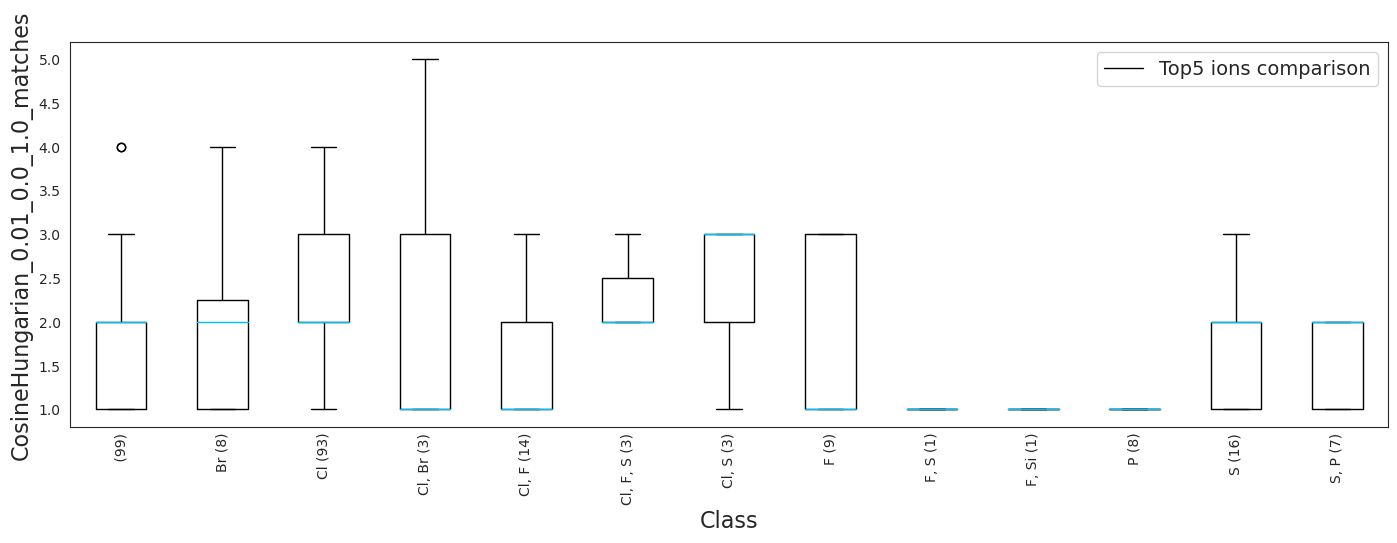

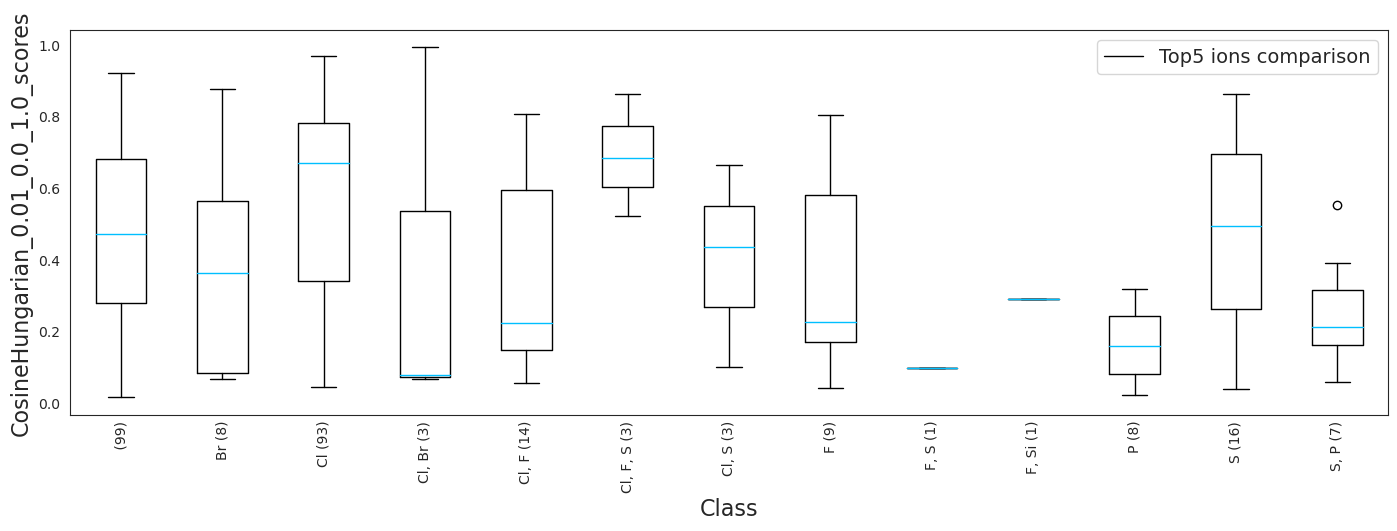

In [122]:
make_boxplot(merged_top5_same.groupby('true_names'), 'CosineHungarian_0.01_0.0_1.0_matches', 'Top5 ions comparison')
make_boxplot(merged_top5_same.groupby('true_names'), 'CosineHungarian_0.01_0.0_1.0_scores', 'Top5 ions comparison')

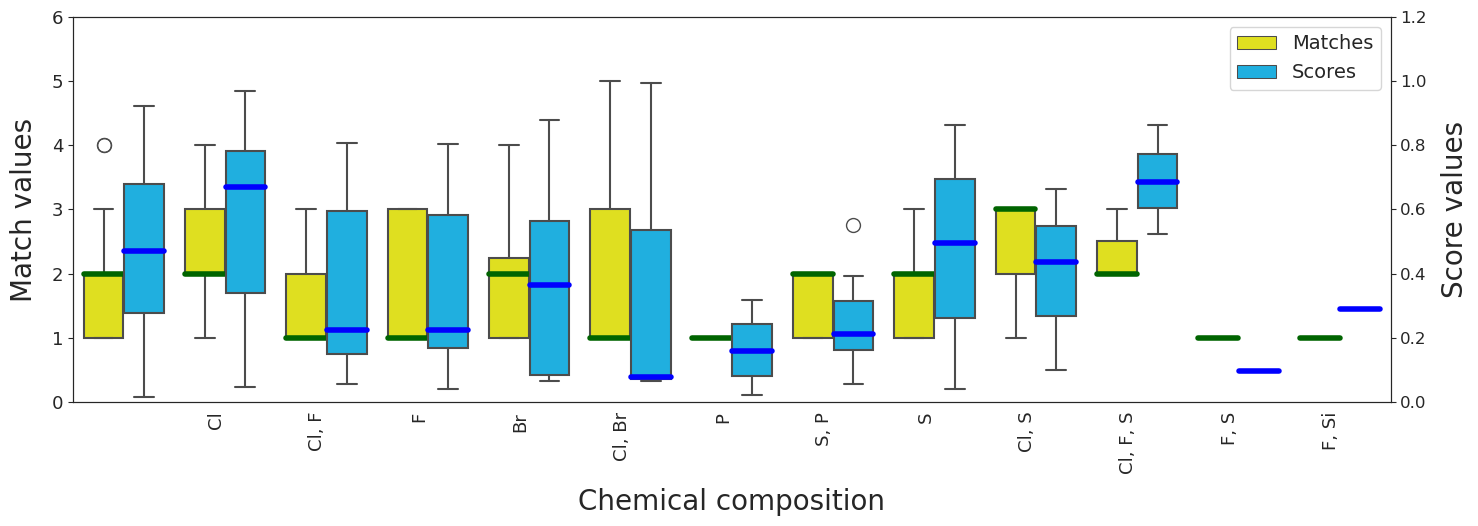

In [181]:
sns.set_style(style='white')
plt.figure(figsize=(17, 5))

# Concatenate the DataFrames in df1_list and add a 'value' column with the value 'matches'.
df1 = merged_top5_same[['query', 'reference', 'true_names', 'CosineHungarian_0.01_0.0_1.0_matches']].copy()

# Concatenate the DataFrames in df2_list and add a 'value' column with the value 'scores'.
df2 = merged_top5_same[['query', 'reference', 'true_names', 'CosineHungarian_0.01_0.0_1.0_scores']].copy()

# Concatenate df1 and df2 into a single DataFrame.
df_cat = pd.concat([df1, df2])
mdf = pd.melt(df_cat, id_vars=['query', 'reference', 'true_names'], var_name=['Number'])      # MELT
#print(mdf.head(5))

# Set the color palette
colors = ['yellow', 'deepskyblue']
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(x="true_names", y="value", hue="Number", 
                data=mdf, hue_order=['CosineHungarian_0.01_0.0_1.0_matches',np.nan],
                medianprops={'color': 'darkgreen', 'linewidth': 4.0},
                flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'none'})  # RUN PLOT   
ax2 = ax.twinx()

sns.boxplot(ax=ax2,x='true_names', y='value', hue='Number',
            data=mdf, hue_order=[np.nan, 'CosineHungarian_0.01_0.0_1.0_scores'], 
            medianprops={'color': 'b', 'linewidth': 4.0}, 
            flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'none'})

ax.legend_.remove()
ax.set_ylim([0, 6])  # Set y-axis limits
ax.yaxis.set_major_locator(plt.MultipleLocator(1))  # Set major tick marks
ax.set_ylabel('Match values')  # Set y-axis label
ax.yaxis.label.set_size(20)  # Set font size of y-axis label
ax.set_xlabel('Chemical composition', fontsize=20)  # Set x-axis label and font size
ax.tick_params(axis='x', labelsize=13)  # Set font size of x-axis tick labels
ax.tick_params(axis='y', labelsize=13)  # Set font size of y-axis tick labels
ax.yaxis.labelpad = 10
ax.xaxis.labelpad = 10

# Add x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

ax2.legend_.remove()
ax2.set_ylim([0, 1.2])  # Set y-axis limits
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.2))  # Set major tick marks
ax2.set_ylabel('Score values')  # Set y-axis label
ax2.yaxis.label.set_size(20)  # Set font size of y-axis label
ax2.tick_params(axis='y', labelsize=12)  # Set font size of y-axis tick labels
ax2.yaxis.labelpad = 10

# Change the legend labels
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'Matches'
labels[1] = 'Scores'
ax.legend(handles, labels, loc='upper right', fontsize=14)



#  Add count labels to the plot
counts = mdf.groupby("true_names")['Number'].count().reset_index()

plt.show()
plt.savefig('../Python_scripts/chemical_composition_boxplot.png', dpi=300, bbox_inches='tight')  # SAVE PLOT AS PNG FILE
plt.clf()
plt.close()

In [124]:
# count = len(top5_same[top5_same['CosineHungarian_0.01_0.0_1.0_scores']>0.65])

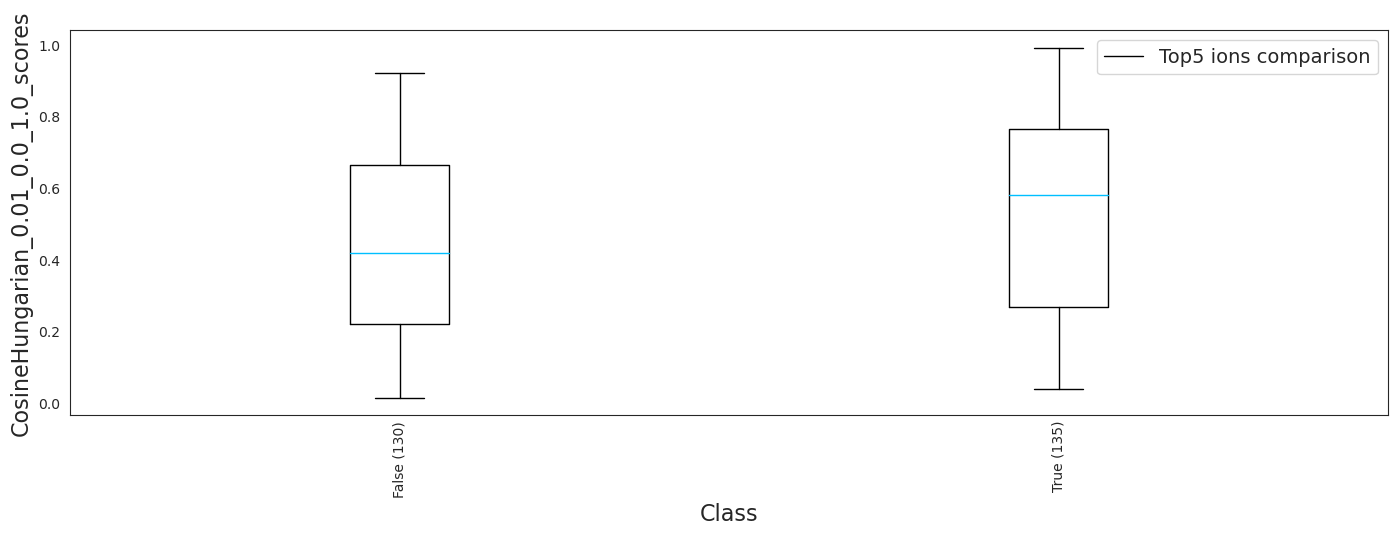

In [125]:
make_boxplot(merged_top5_same.groupby('has_halogen'), 'CosineHungarian_0.01_0.0_1.0_scores', 'Top5 ions comparison')

In [126]:
# group the DataFrame by the 'class' column
grouped_df = merged_df.groupby('class')

# create a figure with one subplot
fig, ax1 = plt.subplots(1, figsize=(16, 6))

# plot a histogram of the 'CosineHungarian_score' column for each group
for group_name, group_df in grouped_df:
    freq = len(group_df)
    if freq > 1:
        ax1.hist(group_df['CosineHungarian_0.1_0.0_1.0_scores'], alpha=0.5, label=group_name)
    else:
        ax1.hist(group_df['CosineHungarian_0.1_0.0_1.0_scores'], alpha=0.5)

# set the x-axis label, y-axis label, and title
ax1.set_xlabel('Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram')

# set the x-axis ticks and tick labels
x_min = merged_df['CosineHungarian_0.1_0.0_1.0_scores'].min()
x_max = merged_df['CosineHungarian_0.1_0.0_1.0_scores'].max()
x_range = x_max - x_min
x_ticks = np.arange(x_min-0.5, x_max+1.0, x_range/10)
x_tick_labels = [str(round(x, 1)) for x in x_ticks]
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_tick_labels)

# set the x-axis range
ax1.set_xlim([-0.5, 1.0])

# set the y-axis ticks and tick labels
y_max = ax1.get_ylim()[1]
y_ticks = np.arange(0, y_max+1, 2)
ax1.set_yticks(y_ticks)

# add a legend to the plot for groups with frequency greater than 1
handles, labels = ax1.get_legend_handles_labels()
handles_filtered = []
labels_filtered = []
for handle, label in zip(handles, labels):
    if label != '' and label not in labels_filtered:
        labels_filtered.append(label)
        handles_filtered.append(handle)
ax1.legend(handles_filtered, labels_filtered)

# display the plot
plt.show()

NameError: name 'merged_df' is not defined